<a href="https://colab.research.google.com/github/RiskyHermawan/TugasBesar_TKC_141_167/blob/main/precission_%26_recall_tes2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library 
import pandas as pd
import numpy as np
import os, cv2, shutil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm.notebook import tqdm as tq
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPooling2D, GlobalAveragePooling2D, AveragePooling2D, BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import EfficientNetB0
from google.colab import files
from keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/TugasBesarTKC/Code&Dataset"

/content/drive/MyDrive/TugasBesarTKC/Code&Dataset


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator( rescale=1./255,        
                              horizontal_flip=True,
                              height_shift_range=.2,
                              width_shift_range=.2,
                              vertical_flip = True
                             )

In [ ]:
input_shape = (150, 150)

train = '/content/drive/MyDrive/TugasBesarTKC/Code&Dataset/SplitFlowers/train'
train_generator = datagen.flow_from_directory(train,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)
validation = '/content/drive/MyDrive/TugasBesarTKC/Code&Dataset/SplitFlowers/val'
validation_generator = datagen.flow_from_directory(validation,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)

test = '/content/drive/MyDrive/TugasBesarTKC/Code&Dataset/SplitFlowers/test'
test_generator = datagen.flow_from_directory(test,
                                              target_size=input_shape,
                                              class_mode='categorical',
                                              batch_size=32,
                                              color_mode='rgb',
                                              shuffle= False)

Found 200 images belonging to 5 classes.
Found 25 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam

model_tf= VGG16(include_top=False, input_tensor=Input(shape=(150,150,3)))
model_tf.trainable = False

model_tf.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
model = Sequential()
model.add(model_tf)
model.add(Dropout(0.25))
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Print model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 dropout_1 (Dropout)         (None, 4, 4, 512)         0         
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1048704   
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 5)                

In [ ]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['acc'])

In [ ]:
N = model.fit(
    train_generator,
    epochs=100,
    validation_data = validation_generator
    )

Epoch 1/100
7/7 [==============================] - 53s 5s/step - loss: 1.7871 - acc: 0.1550 - val_loss: 1.5407 - val_acc: 0.2400
Epoch 2/100
7/7 [==============================] - 4s 509ms/step - loss: 1.6114 - acc: 0.2150 - val_loss: 1.5419 - val_acc: 0.2000
Epoch 3/100
7/7 [==============================] - 4s 509ms/step - loss: 1.5579 - acc: 0.2250 - val_loss: 1.4931 - val_acc: 0.2400
Epoch 4/100
7/7 [==============================] - 4s 581ms/step - loss: 1.4917 - acc: 0.2600 - val_loss: 1.4383 - val_acc: 0.3200
Epoch 5/100
7/7 [==============================] - 4s 514ms/step - loss: 1.4740 - acc: 0.3000 - val_loss: 1.4032 - val_acc: 0.3600
Epoch 6/100
7/7 [==============================] - 4s 516ms/step - loss: 1.4141 - acc: 0.3950 - val_loss: 1.2796 - val_acc: 0.4800
Epoch 7/100
7/7 [==============================] - 4s 507ms/step - loss: 1.3268 - acc: 0.4650 - val_loss: 1.2219 - val_acc: 0.6000
Epoch 8/100
7/7 [==============================] - 4s 506ms/step - loss: 1.2332 - acc

In [ ]:
model.save("modeltes2.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# Convert the model 1
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model 1.
with open('modeltes2.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpsvpi0d0k/assets


INFO:tensorflow:Assets written to: /tmp/tmpsvpi0d0k/assets


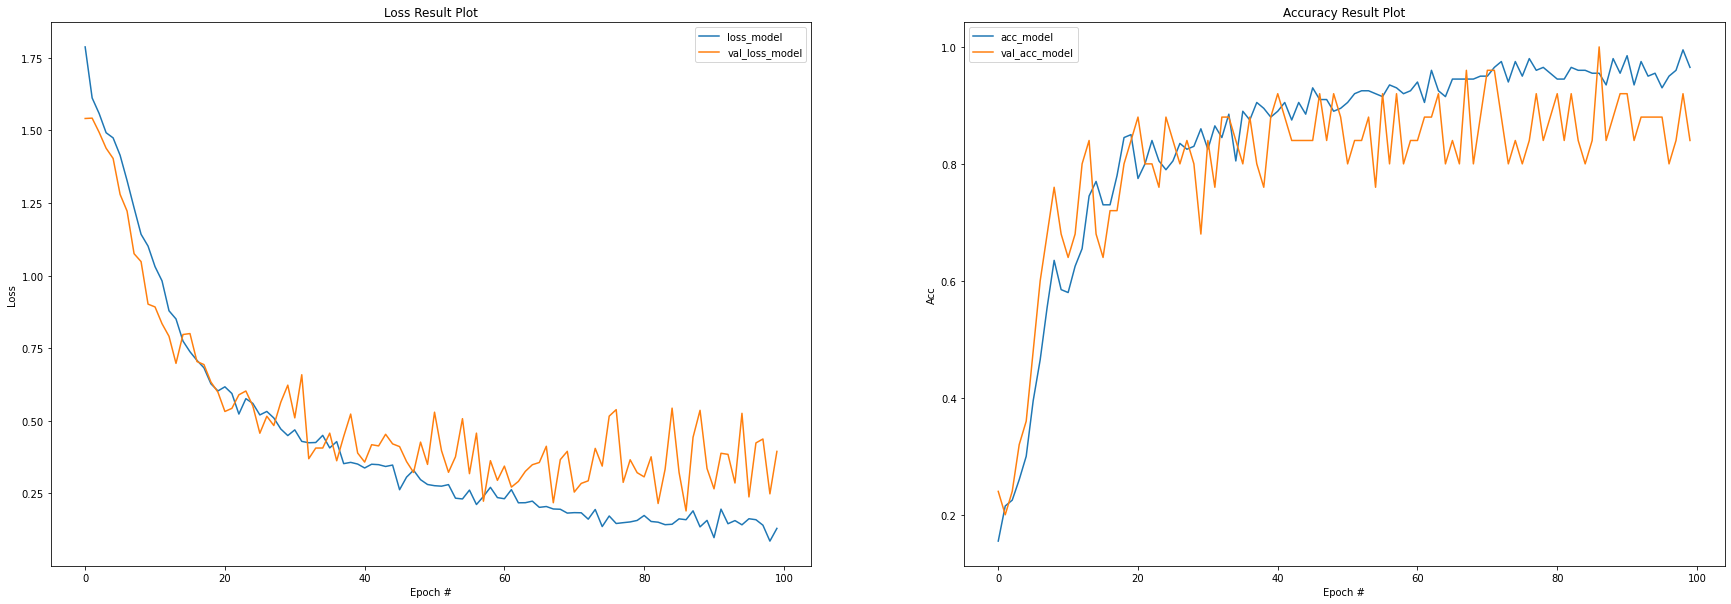

In [ ]:
import numpy as np

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(30)

ax1.plot(np.arange(0, 100), N.history["loss"], label="loss_model")
ax1.plot(np.arange(0, 100), N.history["val_loss"], label="val_loss_model")
ax1.set_title("Loss Result Plot")
ax1.set_xlabel("Epoch #")
ax1.set_ylabel("Loss")
ax1.legend()


ax2.plot(np.arange(0, 100), N.history["acc"], label="acc_model")
ax2.plot(np.arange(0, 100), N.history["val_acc"], label="val_acc_model")
ax2.set_title("Accuracy Result Plot")
ax2.set_xlabel("Epoch #")
ax2.set_ylabel("Acc")
ax2.legend()

Accuracy: 92.00%


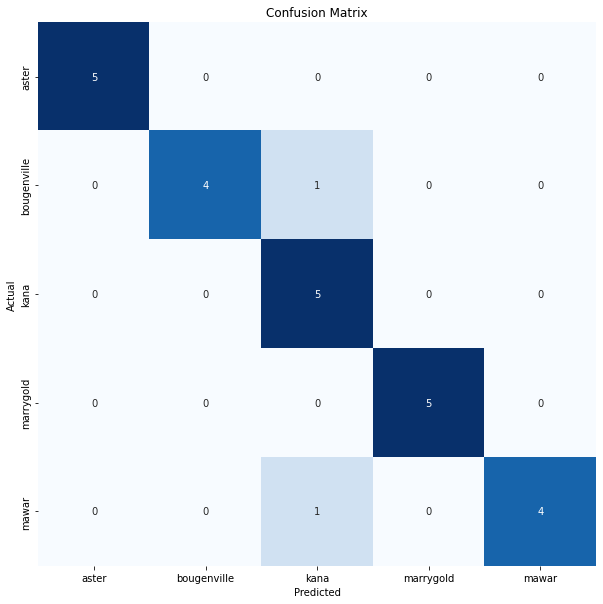

Classification Report:
----------------------
               precision    recall  f1-score   support

       aster       1.00      1.00      1.00         5
 bougenville       1.00      0.80      0.89         5
        kana       0.71      1.00      0.83         5
   marrygold       1.00      1.00      1.00         5
       mawar       1.00      0.80      0.89         5

    accuracy                           0.92        25
   macro avg       0.94      0.92      0.92        25
weighted avg       0.94      0.92      0.92        25



In [ ]:
import seaborn as sns

acc = model.evaluate(validation_generator, verbose=0)[1]
print("Accuracy: {:.2f}%".format(acc * 100))

predictions = np.argmax(model.predict(validation_generator), axis=1)

cm = confusion_matrix(validation_generator.labels, predictions, labels=[0, 1, 2, 3, 4])
clr = classification_report(validation_generator.labels, predictions, labels=[0, 1, 2, 3, 4], target_names=["aster", "bougenville", "kana", "marrygold", "mawar"])

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=["aster", "bougenville", "kana", "marrygold", "mawar"])
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5], labels=["aster", "bougenville", "kana", "marrygold", "mawar"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [ ]:
from sklearn.metrics import classification_report

ypred = model.predict(validation_generator)
predictions = np.argmax(ypred, axis = 1)
print(classification_report(validation_generator.classes,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.83      1.00      0.91         5
           2       1.00      0.80      0.89         5
           3       0.83      1.00      0.91         5
           4       1.00      0.80      0.89         5

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted avg       0.93      0.92      0.92        25

